## Урок 3

### Классификация. Логистическая регрессия.

#### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [2]:
# ДАНО:
# def calc_logloss(y, y_pred):
#     err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
#     return err


# ПРЕОБРАЗОВАНО:

# Documentation. epsfloat, default=1e-15
# Log loss is undefined for p=0 or p=1, so probabilities are clipped to max(eps, min(1 - eps, p)).
def calc_logloss(y, y_pred, epsfloat=1e-10):
    y_pred[y_pred==1] -= epsfloat
    y_pred[y_pred==0] += epsfloat
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

#### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [3]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [4]:
def eval_model(X, y, iterations):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        
        alpha = i/10 
        
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, alpha,  W, err)
    return W

In [5]:
W1 = eval_model(X_st, y, 2000)
W1

200 20.0 [-67.13791502 -27.0996308   10.74144255  92.87181507] 3.6224118204648716
400 40.0 [-204.43418723  -43.36299182  -21.4296857   208.36455   ] 3.397902955647175
600 60.0 [-313.82275837  -42.02093642  -83.23351593  263.60279684] 1.322402342505224
800 80.0 [-412.17021719  -56.60787017  -93.10072425  372.68737654] 0.0019301868969659297
1000 100.0 [-413.32902565  -55.81793679  -94.66407892  371.52856898] 0.0015618010024095578
1200 120.0 [-414.02651544  -55.83908332  -96.04779441  370.83108029] 0.0014292293994387542
1400 140.0 [-414.63668649  -56.08738226  -97.47584112  370.22091054] 0.0013195519172037409
1600 160.0 [-415.21888664  -56.45458107  -98.96298169  369.63871188] 0.001218655616122387
1800 180.0 [-415.79114379  -56.89411013 -100.50015398  369.06645644] 0.0011241591707685488
2000 200.0 [-416.35942887  -57.37922181 -102.07341314  368.49817326] 0.0010357864716645086


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


array([-416.35942887,  -57.37922181, -102.07341314,  368.49817326])

#### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [6]:
def calc_pred_proba(W, X):
    return sigmoid(np.dot(W, X))

In [7]:
cpp = calc_pred_proba(W1, X_st)
cpp

array([5.21797448e-03, 2.72588574e-21, 1.00000000e+00, 3.78129739e-12,
       1.00000000e+00, 1.63247590e-05, 1.00000000e+00, 2.43168906e-44,
       9.94907371e-01, 1.00000000e+00])

#### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [8]:
def calc_pred(W, X, split=0.5):
    y_pred = calc_pred_proba(W, X)
    y_pred[y_pred < split] = 0
    y_pred[y_pred >= split] = 1
    return y_pred

In [9]:
y_pred1 = calc_pred(W1, X_st)
y_pred1

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

#### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [10]:
import pandas as pd
df = pd.DataFrame({'pred': y_pred1, 'true': y})
df.head()    

,pred,true
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0


In [11]:
TP = len(df[(df.pred == df.true) & (df.pred == 1)])
TN = len(df[(df.pred == df.true) & (df.pred == 0)])
FP = len(df[(df.pred == 1) & (df.true == 0)])
FN = len(df[(df.pred == 0) & (df.true == 1)])
print(np.array([[TP, FP],
                [FN, TN]]))

accuracy = len(df[df.pred == df.true]) / len(y)
print(f'accuracy = {accuracy}')

Presicion = TP / TP + FP
print(f"Presicion = {Presicion}")

Recall = TP / TP + FN
print(f'Recall = {Recall}')

f1 = (2 * Presicion * Recall) / (Presicion + Recall)
print(f'f1 = {f1}')

[[5 0]
 [0 5]]
accuracy = 1.0
Presicion = 1.0
Recall = 1.0
f1 = 1.0


In [12]:
# Проверим правильно ли сделан ручной расчет
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred1))
accuracy_score(y, y_pred1), precision_score(y, y_pred1), recall_score(y, y_pred1), f1_score(y, y_pred1)

[[5 0]
 [0 5]]


(1.0, 1.0, 1.0, 1.0)

#### 6. Могла ли модель переобучиться? Почему?

Модель переобучилась, поскольку веса подобраны слишком точно и метрики получились максимальными при такой малой выборке, в которой к тому же признаки имеют сильную корреляцию между собой. 

In [13]:
W1

array([-416.35942887,  -57.37922181, -102.07341314,  368.49817326])

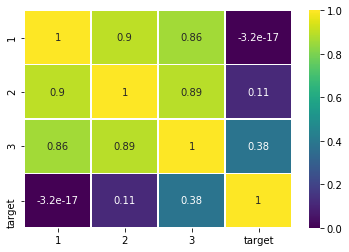

In [16]:
import seaborn as sns
dataf = pd.DataFrame({'1': X[1, :].T, '2': X[2, :].T, '3': X[3, :].T, 'target': y.T})
sns.heatmap( dataf.corr(), annot=True, linewidths=.5, cmap="viridis")